In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
cpu_data = []
for ncpu in [1, 2, 4, 8, 16, 32]:
    df = pd.read_csv(f'notes/data/i9-14900HX/{ncpu}cpu.csv')
    df['gpu_type'] = 'i9-14900HX'
    df['ncpu'] = ncpu
    cpu_data.append(df)

df = pd.concat(cpu_data, ignore_index=True)
df

,structure,nat,nprim,maxl,max_nnl,mean_nnl,max_nsh,cpu_time,gpu_type,ncpu
0,alkane_64,192,6,1,30,20,2,27.576135,i9-14900HX,1
1,alkane_128,384,6,1,30,21,2,58.374596,i9-14900HX,1
2,alkane_256,768,6,1,30,21,2,127.952297,i9-14900HX,1
3,103l-hydrolase,1404,6,2,310,99,3,1575.728317,i9-14900HX,1
4,alkane_512,1536,6,1,30,21,2,279.308855,i9-14900HX,1
5,alkane_1024,3072,6,1,30,21,2,704.700987,i9-14900HX,1
6,alkane_2048,6144,6,1,30,21,2,1870.311269,i9-14900HX,1
7,alkane_64,192,6,1,30,20,2,16.223582,i9-14900HX,2
8,alkane_128,384,6,1,30,21,2,32.757154,i9-14900HX,2
9,alkane_256,768,6,1,30,21,2,77.568121,i9-14900HX,2


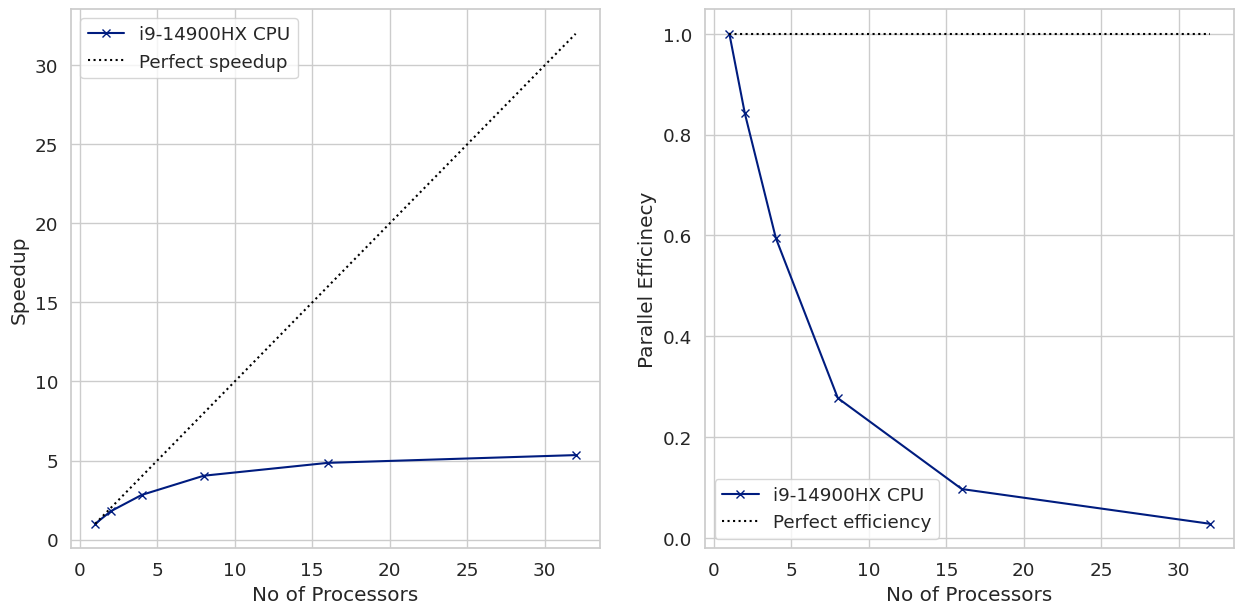

In [95]:
# plt.figure(figsize=(5,5), dpi=200)
def make_strong_scaling(df):
  df = df[~df.structure.str.contains('alkane')].reset_index(drop=True)
  speedup = df.cpu_time.loc[0].item() / df.cpu_time.values 
  ideal_speedup = df.ncpu.values
  plt.plot(df['ncpu'].values, speedup, 'x-', label='i9-14900HX CPU')
  plt.plot(df['ncpu'].values, ideal_speedup, ':k', label="Perfect speedup")
  plt.xlabel("No of Processors");
  plt.ylabel("Speedup");
  plt.grid(True)
  plt.legend()

def make_weak_scaling_eff(df):
  df = df[df.structure.str.contains('alkane')].reset_index(drop=True)
  probsize = df.structure.str.slice(7).astype(int)
  df['probsize'] = probsize
  df = df[df.probsize / 64 == df['ncpu']]
  speedup = df.cpu_time.loc[0].item() / df.cpu_time.values
  plt.plot(df['ncpu'].values, speedup, 'x-', label='i9-14900HX CPU')
  plt.plot(df['ncpu'].values, np.ones_like(df['ncpu'].values), ':k', label="Perfect efficiency")
  plt.ylabel("Parallel Efficinecy")
  plt.xlabel("No of Processors")
  plt.grid(True)
  plt.legend()

plt.figure(figsize=(15, 7))
sns.set_style("whitegrid")
plt.subplot(121)
make_strong_scaling(df)
plt.subplot(122)
make_weak_scaling_eff(df)
plt.show()

In [22]:
all_data = []
df = pd.read_csv(f'notes/data/RTX4060/gpu.csv')
df['gpu_type'] = 'RTX4060'
all_data.append(df)

# for ncpu in [1, 2, 4, 8, 16, 32]:
#     df = pd.read_csv(f'notes/data/v100/{ncpu}cpu.csv')
#     df['gpu_type'] = 'v100'
#     df['ncpu'] = ncpu
#     all_data.append(df)

df = pd.read_csv(f'notes/data/RTX4090/gpu.csv')
df['gpu_type'] = 'RTX4090'
all_data.append(df)

df = pd.concat(all_data, ignore_index=True)

In [23]:
df

,structure,nat,nprim,maxl,max_nnl,mean_nnl,max_nsh,cpu_time,gpu_gb_in,gpu_gb_out,gpu_gb_total,gpu_between_atoms,gpu_in_atoms,gpu_time,gpu_transfer_time,gpu_type
0,GLU,29,6,1,28,14,2,11.985369,0.000453,0.000444,0.000896,10.739712,2.131936,12.871648,0.954560,RTX4060
1,alkane_64,192,6,1,30,20,2,8.414220,0.013026,0.012976,0.026002,9.414656,1.933568,11.348224,6.645632,RTX4060
2,alkane_128,384,6,1,30,21,2,14.909392,0.052005,0.051905,0.103909,17.855583,2.703648,20.559231,21.178593,RTX4060
3,dna,387,6,2,165,69,3,59.047182,0.232068,0.231803,0.463871,212.961273,9.908224,222.869492,87.494461,RTX4060
4,101d-netropsin-and-dna,556,6,2,484,203,3,105.978783,0.479133,0.478153,0.957286,383.203156,10.908800,394.111969,166.830170,RTX4060
5,alkane_256,768,6,1,30,21,2,32.171431,0.207819,0.207618,0.415437,50.085888,5.079040,55.164928,90.081284,RTX4060
6,1lyz-lysozyme,1102,6,2,311,99,3,210.940091,1.749900,1.748891,3.498791,541.932922,15.230976,557.163879,575.938538,RTX4060
7,103l-hydrolase,1404,6,2,309,99,3,320.774930,2.816439,2.815150,5.631588,673.622864,17.464289,691.087158,962.728943,RTX4060
8,alkane_512,1536,6,1,30,21,2,86.739008,0.830875,0.830472,1.661347,71.779327,6.709184,78.488510,292.157104,RTX4060
9,alkane_1024,3072,6,1,30,21,2,290.792890,3.322695,3.321889,6.644584,137.043198,11.519104,148.562302,1141.643188,RTX4060


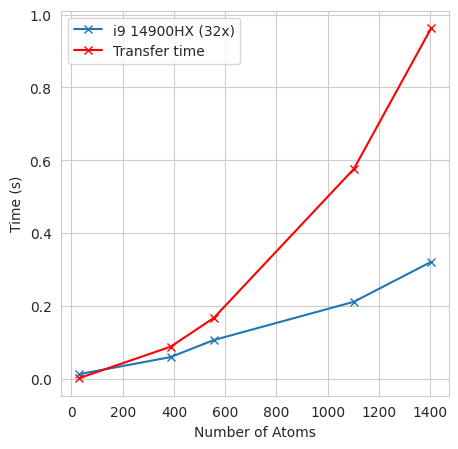

In [25]:
def make_process_on_cpu_vs_copy_to_gpu(df):

  mask = ~df.structure.str.contains('alkan') & df.gpu_type.str.contains('RTX4060')
  x = df[mask].nat
  y = df[mask].gpu_transfer_time / 1000
  z = df[mask].cpu_time / 1000
  w = df[mask].gpu_time / 1000
  plt.figure(figsize=(5, 5))
  sns.set_style("whitegrid")
  plt.plot(x,z, 'x-', label='i9 14900HX (32x)')
  plt.plot(x,y, 'x-r', label='Transfer time')
  plt.xlabel('Number of Atoms')
  plt.ylabel('Time (s)')
  plt.grid(True)
  plt.legend()

make_process_on_cpu_vs_copy_to_gpu(df)

In [70]:
df

,structure,nat,nprim,maxl,max_nnl,mean_nnl,max_nsh,cpu_time,gpu_gb_in,gpu_gb_out,gpu_gb_total,gpu_between_atoms,gpu_in_atoms,gpu_time,gpu_transfer_time,gpu_type
0,GLU,29,6,1,28,14,2,11.985369,0.000453,0.000444,0.000896,10.739712,2.131936,12.871648,0.954560,RTX4060
1,alkane_64,192,6,1,30,20,2,8.414220,0.013026,0.012976,0.026002,9.414656,1.933568,11.348224,6.645632,RTX4060
2,alkane_128,384,6,1,30,21,2,14.909392,0.052005,0.051905,0.103909,17.855583,2.703648,20.559231,21.178593,RTX4060
3,dna,387,6,2,165,69,3,59.047182,0.232068,0.231803,0.463871,212.961273,9.908224,222.869492,87.494461,RTX4060
4,101d-netropsin-and-dna,556,6,2,484,203,3,105.978783,0.479133,0.478153,0.957286,383.203156,10.908800,394.111969,166.830170,RTX4060
5,alkane_256,768,6,1,30,21,2,32.171431,0.207819,0.207618,0.415437,50.085888,5.079040,55.164928,90.081284,RTX4060
6,1lyz-lysozyme,1102,6,2,311,99,3,210.940091,1.749900,1.748891,3.498791,541.932922,15.230976,557.163879,575.938538,RTX4060
7,103l-hydrolase,1404,6,2,309,99,3,320.774930,2.816439,2.815150,5.631588,673.622864,17.464289,691.087158,962.728943,RTX4060
8,alkane_512,1536,6,1,30,21,2,86.739008,0.830875,0.830472,1.661347,71.779327,6.709184,78.488510,292.157104,RTX4060
9,alkane_1024,3072,6,1,30,21,2,290.792890,3.322695,3.321889,6.644584,137.043198,11.519104,148.562302,1141.643188,RTX4060


In [3]:
all_data = []
df = pd.read_csv(f'notes/data/i9-14900HX/32allcpu.csv')
df['processor'] = 'i9-14900HX (32x)'
df['time'] = df['cpu_time']
all_data.append(df)

df = pd.read_csv(f'notes/data/Tesla_V100-SXM2-32GB/gpu.csv')
df['processor'] = 'Tesla_V100-SXM2-32GB'
df['time'] = df['gpu_time']
all_data.append(df)

df = pd.read_csv(f'notes/data/H100_80GB_HBM3/gpu.csv')
df['processor'] = 'H100_80GB_HBM3'
df['time'] = df['gpu_time']
all_data.append(df)

df = pd.read_csv(f'notes/data/RTX4090/gpu.csv')
df['processor'] = 'RTX4090'
df['time'] = df['gpu_time']
all_data.append(df)
df = pd.concat(all_data, ignore_index=True)
df['processor'] = df.processor.str.replace('-',' ').str.replace('_',' ')
df

,structure,nat,nprim,maxl,max_nnl,mean_nnl,max_nsh,cpu_time,processor,time,gpu_gb_in,gpu_gb_out,gpu_gb_total,gpu_between_atoms,gpu_in_atoms,gpu_time,gpu_transfer_time
0,GLU,29,6,1,28,14,2,12.926781,i9 14900HX (32x),12.926781,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,alkane_64,192,6,1,30,20,2,7.539956,i9 14900HX (32x),7.539956,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,alkane_128,384,6,1,30,21,2,12.868747,i9 14900HX (32x),12.868747,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,dna,387,6,2,166,69,3,57.028620,i9 14900HX (32x),57.028620,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,alkane_256,768,6,1,30,21,2,28.582178,i9 14900HX (32x),28.582178,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1lyz-lysozyme,1102,6,2,308,99,3,231.494165,i9 14900HX (32x),231.494165,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,103l-hydrolase,1404,6,2,312,99,3,324.561817,i9 14900HX (32x),324.561817,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,alkane_512,1536,6,1,30,21,2,83.130808,i9 14900HX (32x),83.130808,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,alkane_1024,3072,6,1,30,21,2,285.172123,i9 14900HX (32x),285.172123,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,alkane_2048,6144,6,1,30,21,2,1457.929060,i9 14900HX (32x),1457.929060,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,structure,nat,nprim,maxl,max_nnl,mean_nnl,max_nsh,cpu_time,processor,time,gpu_gb_in,gpu_gb_out,gpu_gb_total,gpu_between_atoms,gpu_in_atoms,gpu_time,gpu_transfer_time
1,alkane_64,192,6,1,30,20,2,7.539956,i9 14900HX (32x),7.539956,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,alkane_64,192,6,1,30,20,2,170.133820,Tesla V100 SXM2 32GB,2.224128,0.013026,0.012976,0.026002,1.390592,0.833536,2.224128,20.945919
21,alkane_64,192,6,1,30,20,2,38.637041,H100 80GB HBM3,0.794336,0.013026,0.012976,0.026002,0.495456,0.298880,0.794336,7.392961
31,alkane_64,192,6,1,30,20,2,26.773375,RTX4090,1.562656,0.013026,0.012976,0.026002,1.124256,0.438400,1.562656,9.479776


,structure,nat,nprim,maxl,max_nnl,mean_nnl,max_nsh,cpu_time,processor,time,gpu_gb_in,gpu_gb_out,gpu_gb_total,gpu_between_atoms,gpu_in_atoms,gpu_time,gpu_transfer_time
2,alkane_128,384,6,1,30,21,2,12.868747,i9 14900HX (32x),12.868747,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,alkane_128,384,6,1,30,21,2,200.901810,Tesla V100 SXM2 32GB,2.094080,0.052005,0.051905,0.103909,1.459200,0.634880,2.094080,55.159805
22,alkane_128,384,6,1,30,21,2,38.625414,H100 80GB HBM3,0.877568,0.052005,0.051905,0.103909,0.603136,0.274432,0.877568,21.010399
32,alkane_128,384,6,1,30,21,2,30.221420,RTX4090,2.428608,0.052005,0.051905,0.103909,1.960640,0.467968,2.428608,38.033791


,structure,nat,nprim,maxl,max_nnl,mean_nnl,max_nsh,cpu_time,processor,time,gpu_gb_in,gpu_gb_out,gpu_gb_total,gpu_between_atoms,gpu_in_atoms,gpu_time,gpu_transfer_time
4,alkane_256,768,6,1,30,21,2,28.582178,i9 14900HX (32x),28.582178,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,alkane_256,768,6,1,30,21,2,234.299620,Tesla V100 SXM2 32GB,3.249152,0.207819,0.207618,0.415437,2.608128,0.641024,3.249152,175.925247
24,alkane_256,768,6,1,30,21,2,54.160045,H100 80GB HBM3,1.248928,0.207819,0.207618,0.415437,0.977632,0.271296,1.248928,97.602722
34,alkane_256,768,6,1,30,21,2,50.012103,RTX4090,3.800064,0.207819,0.207618,0.415437,3.168256,0.631808,3.800064,155.214844


,structure,nat,nprim,maxl,max_nnl,mean_nnl,max_nsh,cpu_time,processor,time,gpu_gb_in,gpu_gb_out,gpu_gb_total,gpu_between_atoms,gpu_in_atoms,gpu_time,gpu_transfer_time
7,alkane_512,1536,6,1,30,21,2,83.130808,i9 14900HX (32x),83.130808,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,alkane_512,1536,6,1,30,21,2,312.785093,Tesla V100 SXM2 32GB,5.690368,0.830875,0.830472,1.661347,4.788224,0.902144,5.690368,677.422119
27,alkane_512,1536,6,1,30,21,2,113.497335,H100 80GB HBM3,2.011584,0.830875,0.830472,1.661347,1.503488,0.508096,2.011584,369.374634
37,alkane_512,1536,6,1,30,21,2,94.167576,RTX4090,6.792032,0.830875,0.830472,1.661347,5.540864,1.251168,6.792032,588.715027


,structure,nat,nprim,maxl,max_nnl,mean_nnl,max_nsh,cpu_time,processor,time,gpu_gb_in,gpu_gb_out,gpu_gb_total,gpu_between_atoms,gpu_in_atoms,gpu_time,gpu_transfer_time
8,alkane_1024,3072,6,1,30,21,2,285.172123,i9 14900HX (32x),285.172123,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,alkane_1024,3072,6,1,30,21,2,590.315755,Tesla V100 SXM2 32GB,10.518528,3.322695,3.321889,6.644584,9.103360,1.415168,10.518528,2746.833984
28,alkane_1024,3072,6,1,30,21,2,329.079122,H100 80GB HBM3,3.298688,3.322695,3.321889,6.644584,2.708224,0.590464,3.298688,1438.097656
38,alkane_1024,3072,6,1,30,21,2,293.517738,RTX4090,11.932640,3.322695,3.321889,6.644584,10.413344,1.519296,11.932640,2391.341064


,structure,nat,nprim,maxl,max_nnl,mean_nnl,max_nsh,cpu_time,processor,time,gpu_gb_in,gpu_gb_out,gpu_gb_total,gpu_between_atoms,gpu_in_atoms,gpu_time,gpu_transfer_time
9,alkane_2048,6144,6,1,30,21,2,1457.929060,i9 14900HX (32x),1457.929060,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,alkane_2048,6144,6,1,30,21,2,2647.748654,Tesla V100 SXM2 32GB,20.415489,13.289168,13.287555,26.576724,18.849792,1.565696,20.415489,13466.281250
29,alkane_2048,6144,6,1,30,21,2,1725.059579,H100 80GB HBM3,5.189184,13.289168,13.287555,26.576724,4.671840,0.517344,5.189184,5091.389160
39,alkane_2048,6144,6,1,30,21,2,1122.811957,RTX4090,20.976641,13.289168,13.287555,26.576724,19.293184,1.683456,20.976641,9391.109375


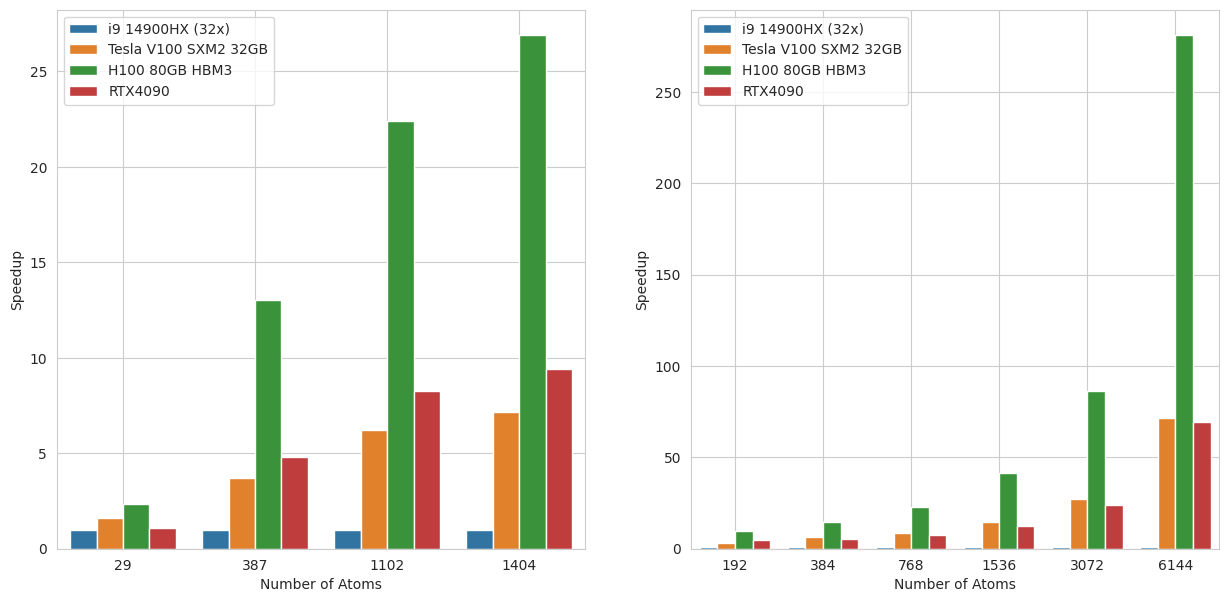

In [ ]:
from IPython.display import display

def relative_perf_plot(df):
  mask = ~df['structure'].str.contains('alkan')
  df = df[mask]

  out = []
  for i,g in df.groupby('nat'):
    cpu_time = g[g['processor'] == 'i9 14900HX (32x)']['time'].item()
    g['relative'] = cpu_time / g['time']
    out.append(g)
  df = pd.concat(out)

  sns.barplot(
    x='nat',
    y='relative',
    hue='processor',
    data=df
  )
  plt.xlabel("Number of Atoms")
  plt.ylabel("Speedup")
  plt.legend()
  plt.grid(True)

def relative_perf_plot_alk(df):
  mask = df['structure'].str.contains('alkan')
  df = df[mask]

  out = []
  for i,g in df.groupby('nat'):
    # display(g)
    cpu_time = g[g['processor'] == 'i9 14900HX (32x)']['time'].item()
    g['relative'] = cpu_time / g['time']
    out.append(g)
  df = pd.concat(out)

  sns.barplot(
    x='nat',
    y='relative',
    hue='processor',
    data=df
  )
  plt.xlabel("Number of Atoms")
  plt.ylabel("Speedup")
  plt.legend()
  plt.grid(True)



plt.figure(figsize=(15, 7))
sns.set_style("whitegrid")
plt.subplot(121)
relative_perf_plot(df)
plt.subplot(122)
relative_perf_plot_alk(df)

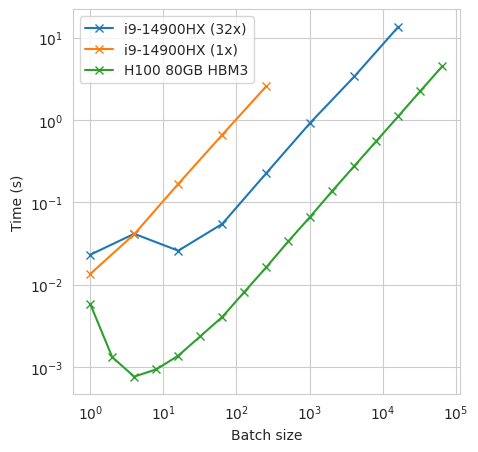

In [28]:
all_data = []
df = pd.read_csv('notes/data/i9-14900HX/32batchallcpu.csv')
df['processor'] = 'i9-14900HX (32x)'
df['time'] = df['cpu_time']
all_data.append(df)

df = pd.read_csv('notes/data/i9-14900HX/1batchcpu.csv')
df['processor'] = 'i9-14900HX (1x)'
df['time'] = df['cpu_time']
all_data.append(df)


df = pd.read_csv('notes/data/H100_80GB_HBM3/batchgpu.csv')
df['processor'] = 'H100 80GB HBM3'
df['time'] = df['gpu_time']
all_data.append(df)

df = pd.concat(all_data)
df

sns.set_style('whitegrid')
def relative_perf_plot(df):
  out = []
  # for i,g in df.groupby('nat')::
  #   # display(g)
  #   cpu_time = g[g['processor'] == 'i9 14900HX (32x)']['time'].item()
  #   g['relative'] = cpu_time / g['time']
  #   out.append(g)
  # df = pd.concat(out)
  for i,g in reversed(list(df.groupby('processor'))):
    plt.plot(
      g['batch_size'],
      g['time'] / 1000,
      'x-',
      label=str(i)
    )
  plt.xscale('log')
  plt.yscale('log')
  plt.xlabel("Batch size")
  plt.ylabel("Time (s)")
  plt.legend()
  plt.grid(True)



plt.figure(figsize=(5,5))
sns.set_style("whitegrid")
# plt.subplot(121)
relative_perf_plot(df)
# plt.subplot(122)
# relative_perf_plot_alk(df)

In [55]:
!meson compile -C build/ && ./build/app/tblite test/perf/aspirin.sdf

INFO: autodetecting backend as ninja
INFO: calculating backend command to run: /usr/bin/ninja -C /home/tornikeo/Documents/personal/thesis/qcxms/subprojects/tblite/build
ninja: Entering directory `/home/tornikeo/Documents/personal/thesis/qcxms/subprojects/tblite/build'
ninja: no work to do.
xTB calculator
 | screened Coulomb repulsion
 | Coulomb electrostatics
 |  * isotropic Klopman-Ohno electrostatics
 |  * anisotropic electrostatics
 |  * onsite third-order electrostatics
 | self-consistent DFT-D4 dispersion

 repulsion energy        4.5921005160310E-01 Eh
 dispersion energy       9.2864624768801E-05 Eh
 number of electrons     6.8000000000000E+01 e
 integral cutoff         1.7347787504999E+01 bohr

 nat          21
 nprim           4
 maxl           1
 max_nnl          20
 mean_nnl          10
 max_nsh           2
------------------------------------------------------------
  cycle        total energy    energy error   density error
--------------------------------------------------

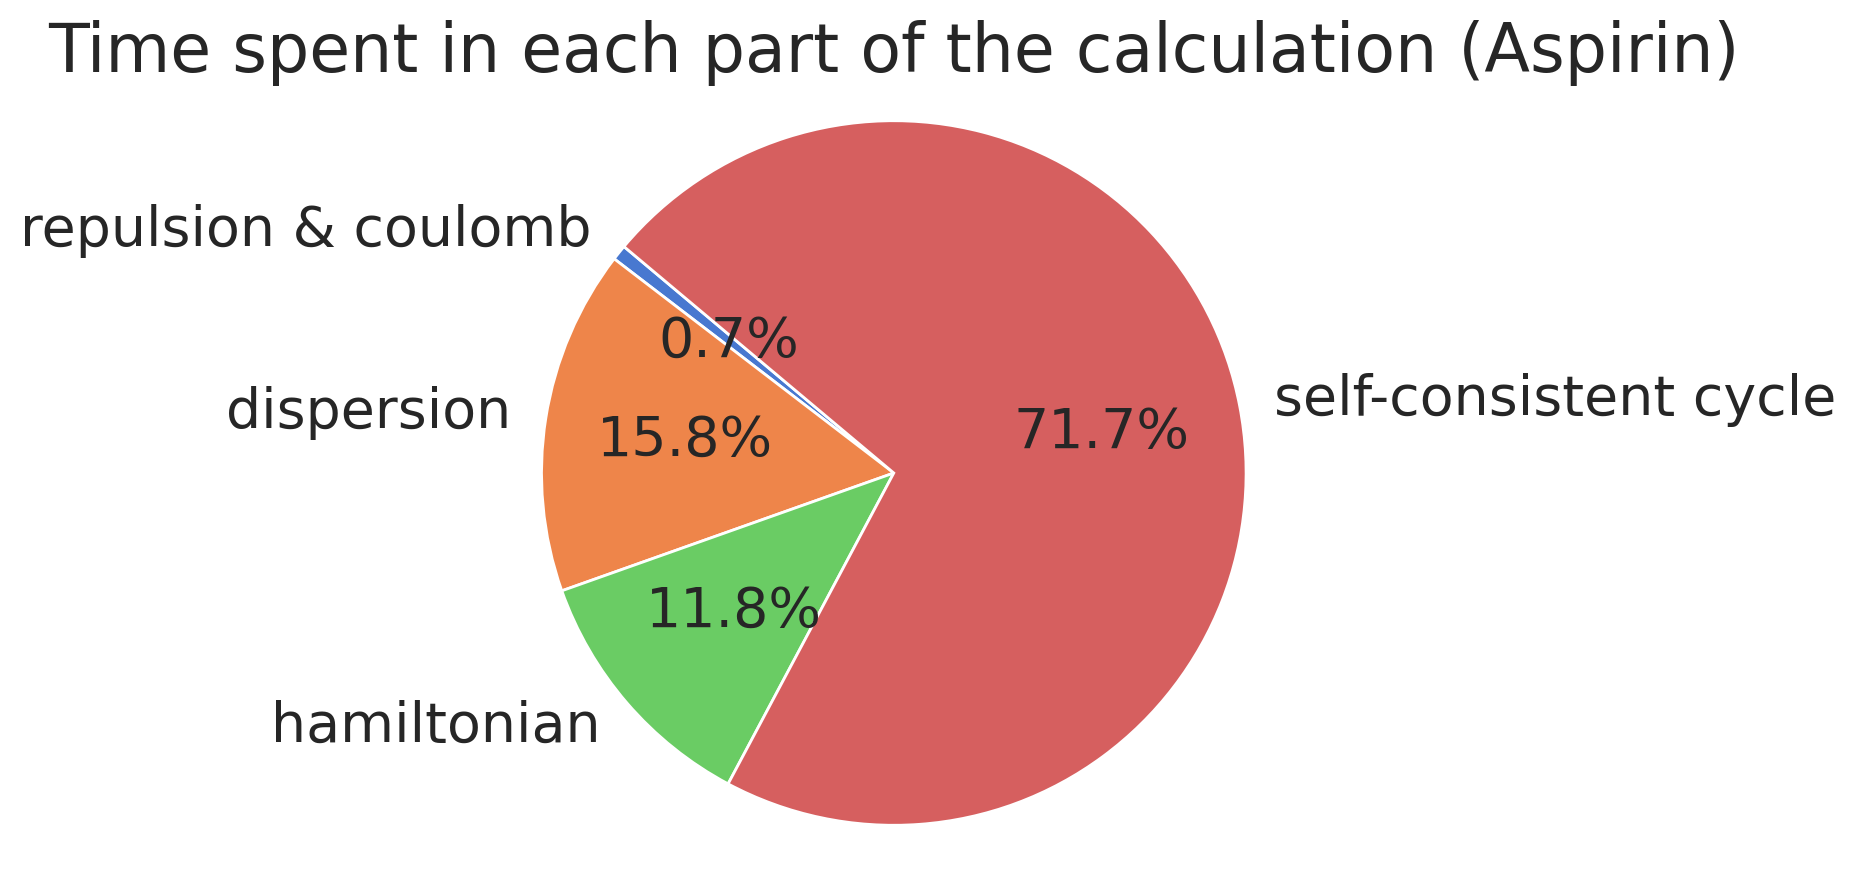

<Figure size 640x480 with 0 Axes>

In [139]:
#  - repulsion                               0.00004974 sec (                                  0%)
#  - coulomb                                 0.00024547 sec (                                  0%)
#  - hamiltonian                             0.00490927 sec (                                 11%)
#  - scc                                     0.02987670 sec (                                 71%)

times = {
  "repulsion & coulomb": 0.00004974 + 0.00024547,
  "dispersion": 0.00659769, # Small molecules don't benefit much from this
  # "coulomb": 0.00024547,
  "hamiltonian": 0.00490927,
  "self-consistent cycle": 0.02987670,
}

# Pie chart on time spent in each part of the calculation, with annotations

sns.set_style("whitegrid")
plt.figure(figsize=(5,5), dpi=200)
# set font, arial and large
plt.rcParams['font.size'] = 20
plt.pie(times.values(), labels=times.keys(), autopct='%1.1f%%', startangle=140, 
        colors=sns.color_palette("muted", n_colors=len(times)))
plt.title('Time spent in each part of the calculation (Aspirin)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
plt.tight_layout()
# Save the figure
plt.savefig('notes/figures/performance_pie.png', dpi=300, bbox_inches='tight')